In [1]:
%matplotlib inline
import pprint  
import math
import numpy as np
import numpy.random as npr
import pandas as pd
import random
import warnings
import collections as ct
from scipy import stats
import scipy.stats as st
from scipy.stats import norm, rayleigh
import matplotlib
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
from sklearn.utils.extmath import cartesian
from pylab import plot, show,hist,figure,title
from fitter import Fitter
import statsmodels.api as sm
from prettytable import PrettyTable

#Imports the fitted distributions for the different variables from a python file called "distributions.py"
from distributions import income_model_dict, drivingdistance_model_dict, drivingduration_model_dict, carprice_model_dict
from helper import selectModel, avgMPH, to_percent
from model import Depreciation, Amortization, Uber_Expense_Model, Car_Ownership_Expense_Model
from defaultVariables import *

/Users/gordontsai/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
# simsize = 100000
# # Time_Worth = npr.normal(loc =150, scale = 30,size=simsize)
# # Car_Price = npr.normal(loc = 24000, scale = 2400,size=simsize)
# # Annual_Miles_Avg = npr.normal(loc = 9000, scale =900,size=simsize)

# Time_Worth = 55
# Car_Price = 50000
# Annual_Miles_Avg = 13000

# ##############################################################################################################
# #EconomicParameters
# Model_Length = 20 # as years
# MPG = 25
# Fuel_Price = 2.5  # as $/gal
# #Trip_Time_Avg = 10  # as num
# Num_Trips_Avg = 2  # as num

# MPG = float(MPG)    
# Fuel_Price = float(Fuel_Price)

# Num_Trips_Avg = float(Num_Trips_Avg)

# if isinstance(Time_Worth, np.ndarray):
#     Time_Worth = [float(Time_Worth[i]) for i in range(0,Time_Worth.size-1)] 
# else: 
#     Time_Worth = float(Time_Worth)

# if isinstance(Annual_Miles_Avg, np.ndarray):
#     Annual_Miles_Avg = [float(Annual_Miles_Avg[i]) for i in range(0,Annual_Miles_Avg.size-1)] 
# else:
#     Annual_Miles_Avg = float(Annual_Miles_Avg)

# if isinstance(Car_Price, np.ndarray):
#     Car_Price = [float(Car_Price[i]) for i in range(0,Car_Price.size-1)] 
# else:
#     Car_Price = float(Car_Price)

# #Global Inputs, Calculated
# Daily_Miles_Avg = Annual_Miles_Avg/365
# Trip_Dist_Avg = Daily_Miles_Avg/Num_Trips_Avg
# Trip_Time_Avg = Daily_Miles_Avg/avgMPH(Annual_Miles_Avg)/Num_Trips_Avg*60 #as minutes 
# #Daily_Miles_Avg = [x / 365 for x in Annual_Miles_Avg]   # as miles/day
# #Trip_Dist_Avg = [x / Num_Trips_Avg for x in Daily_Miles_Avg]
# #Drive_Time_Avg = Trip_Time_Avg*Num_Trips_Avg   # as minutes

# Trip_Time_Avg = float(Trip_Time_Avg)

# ######################################################################################################################
# #Traditional Car Ownership Model 
# #Expenses to Purchase Car, Hardcoded
# #Car_Price = 24000 #as $
# Sales_Tax_Percent = .0625 #as decimal percent
# Purchase_Fees = 250  # as $ for maybe title transfer
# Down_Payment = 5000 #as $
# Loan_Terms = 48 #as months
# AIR = .03 #as decimal percent

# Sales_Tax_Percent = float(Sales_Tax_Percent)
# Purchase_Fees = float(Purchase_Fees)
# Down_Payment = float(Down_Payment)
# Loan_Terms = float(Loan_Terms)
# AIR = float(AIR)
# #Expenses to Purchase Car, Calculated
# #Sales_Tax_Num = Car_Price*Sales_Tax_Percent #as $
# #Loan_Amount = Car_Price - Down_Payment #as $
# #used in car_ownership now
# MIR = AIR/12
# #Monthly_PMT = (MIR*Loan_Amount*(1+MIR)**Loan_Terms)/(((1+MIR)**Loan_Terms)-1)
# #included in Car_Ownership Model

# ##################################################################################################################
# #Direct Expenses to Own Car Avg'd over 10 years
# Maint_Repairs_Exp = 1250 # as $
# Insurance_Exp = 1000 # as $
# Registr_Taxes_Exp = 150 # as $
# Parking_Exp = 200 # as $
# Maint_Repairs_Exp = float(Maint_Repairs_Exp)
# Insurance_Exp = float(Insurance_Exp)
# Registr_Taxes_Exp = float(Registr_Taxes_Exp)
# Parking_Exp = float(Parking_Exp)


# #Now in Car_Ownership
# #Fuel_Exp = [Annual_Miles_Avg[i]/MPG[i]*Fuel_Price[i] for i in range(0,simsize-1)]
# #Total_DE = Maint_Repairs_Exp+Insurance_Exp+Registr_Taxes_Exp+Parking_Exp+Fuel_Exp

# #####################################################################################################################
# #-----------Uber Model
# #-----Expenses for Hiring
# Fare_Base = 2 # as $
# Fare_Per_Mile = 1.50 # as $/mile
# Fare_Per_Minute = .20 # as $/minute
# # Fare_Base = 1 # as $
# # Fare_Per_Mile = .750 # as $/mile
# # Fare_Per_Minute = .10 # as $/minute
# #In Uber_Model

# #In Uber_Model
# #Uber_Exp_Annual = Uber_Exp_Daily*365
# Min_Fee_Uber = 6.0 # as $
# Cancel_Fee_Uber = 8.0 # as $
# Fare_Base = float(Fare_Base)
# Fare_Per_Mile = float(Fare_Per_Mile)
# Fare_Per_Minute = float(Fare_Per_Minute)

# Uber_Trip_Avg = Fare_Base+Fare_Per_Mile*Trip_Dist_Avg+Fare_Per_Minute*Trip_Time_Avg
# Uber_Trip_Avg = float(Uber_Trip_Avg)
# Uber_Exp_Daily =  Uber_Trip_Avg*Num_Trips_Avg

# #Uber_Exp_Annual = float(Uber_Exp_Annual)
# Min_Fee_Uber = float(Min_Fee_Uber)
# Cancel_Fee_Uber = float(Cancel_Fee_Uber)

# #---Annual Value of Time
# Wait_Time_Uber_Avg = 5.0 # as minutes 
# Wait_Time_Uber_Avg = float(Wait_Time_Uber_Avg)
# #Add to Uber Model
# #Val_Time_Daily_Uber = (Wait_Time_Uber_Avg*Num_Trips_Avg)/60*Time_Worth
# #Val_Time_Annual_Uber = Val_Time_Daily_Uber*365
# ###############################################################################################################
# #Annual Indirect Expenses Avg'd over 10 years
# Property_Tax_Garage_IDE= 300 # as $ Garage might be worth $15k; if property tax 2%; garage $300/year
# Garage_Repair_IDE_Ann = 200 # as $
# Property_Tax_Garage_IDE = float(Property_Tax_Garage_IDE)
# Garage_Repair_IDE_Ann = float(Garage_Repair_IDE_Ann)
# Total_IDE = Property_Tax_Garage_IDE+Garage_Repair_IDE_Ann

# #Annual Value of Time
# Walk_Time_Avg= 20 # as minutes
# Walk_Time_Avg = float(Walk_Time_Avg)
# #Val_Drive_Time_Daily = Time_Worth*Drive_Time_Avg/60
# #Val_Walk_Time_Daily = Walk_Time_Avg/60*Time_Worth
# #Val_Time_Daily_Car =Val_Drive_Time_Daily+Val_Walk_Time_Daily
# #Val_Time_Annual_Car = (Val_Time_Daily_Car)*365
# #used in CarOwnership Function now
# #---------------------------------------------------------------------------

Car_Ownership_Expense_Model returns:  
- **a**: Returns a list of size two with [Cumulative Expense for Owning, Cumulative Expenses (Less Value of Car)]  
    - For most problems, the first value of a is the NPV that we care about comparing against Ubering  
- **b**:  
- **c**:

In [ ]:
#Single Test Case used to verify model matches excel document
output_year = (7,)

a,b,c = Car_Ownership_Expense_Model(outputyears= output_year,annualmiles = Annual_Miles_Avg,carprice=Car_Price,timeworth= Time_Worth)
d = Uber_Expense_Model(outputyears= output_year,timeworth=Time_Worth,annualmiles=Annual_Miles_Avg,carprice = Car_Price)

# a is the array output of [Cumulative Expense for Owning, Cumulative Expenses (Less Value of Car)]
Decision=a[0]-d

In [2]:
simsize = 100000

Time_Worth = selectModel(income_model_dict,0).rvs(size = simsize)/2000
Annual_Miles_Avg = selectModel(drivingdistance_model_dict,0).rvs(size = simsize)*365
Annual_Miles_Time = selectModel(drivingduration_model_dict,0).rvs(size = simsize)
Car_Price = selectModel(carprice_model_dict,0).rvs(size = simsize)

In [3]:
Daily_Miles_Avg = [(Annual_Miles_Avg[i]/365) for i in range(0,len(Annual_Miles_Avg))]   # as miles/day
Trip_Dist_Avg = [Daily_Miles_Avg[i]/Num_Trips_Avg for i in range(0,len(Daily_Miles_Avg))]
Trip_Time_Avg = [Daily_Miles_Avg[i]/avgMPH(Annual_Miles_Avg[i])/Num_Trips_Avg*60 for i in range(0,len(Daily_Miles_Avg))] #as minutes 

In [ ]:
# #################################This is for Todd where he asked to divide TIme Worht by 2
# Time_Worth=np.divide(Time_Worth,2)

In [ ]:
# #EconomicParameters
# Model_Length = 20 # as years
# MPG = 25
# Fuel_Price = 2.5  # as $/gal
# #Trip_Time_Avg = 10  # as num
# Num_Trips_Avg = 2  # as num #############Change this back to 3 later

# MPG = float(MPG)    
# Fuel_Price = float(Fuel_Price)
# #Trip_Time_Avg = float(Trip_Time_Avg)
# Num_Trips_Avg = float(Num_Trips_Avg)

# if isinstance(Time_Worth, np.ndarray):
#     Time_Worth = [float(Time_Worth[i]) for i in range(0,Time_Worth.size)] 
# else: 
#     Time_Worth = float(Time_Worth)

# if isinstance(Annual_Miles_Avg, np.ndarray):
#     Annual_Miles_Avg = [float(Annual_Miles_Avg[i]) for i in range(0,Annual_Miles_Avg.size)] 
# else:
#     Annual_Miles_Avg = float(Annual_Miles_Avg)

# if isinstance(Car_Price, np.ndarray):
#     Car_Price = [float(Car_Price[i]) for i in range(0,Car_Price.size)] 
# else:
#     Car_Price = float(Car_Price)

# #Global Inputs, Calculated
# Daily_Miles_Avg = [(Annual_Miles_Avg[i]/365) for i in range(0,len(Annual_Miles_Avg))]   # as miles/day
# Trip_Dist_Avg = [Daily_Miles_Avg[i]/Num_Trips_Avg for i in range(0,len(Daily_Miles_Avg))]
# Trip_Time_Avg = [Daily_Miles_Avg[i]/avgMPH(Annual_Miles_Avg[i])/Num_Trips_Avg*60 for i in range(0,len(Daily_Miles_Avg))] #as minutes 
    
# ######################################################################################################################
# #Traditional Car Ownership Model 
# #Expenses to Purchase Car, Hardcoded
# #Car_Price = 24000 #as $
# Sales_Tax_Percent = .0625 #as decimal percent
# Purchase_Fees = 250  # as $ for maybe title transfer
# Down_Payment = 5000 #as $
# Loan_Terms = 48 #as months
# AIR = .03 #as decimal percent

# Sales_Tax_Percent = float(Sales_Tax_Percent)
# Purchase_Fees = float(Purchase_Fees)
# Down_Payment = float(Down_Payment)
# Loan_Terms = float(Loan_Terms)
# AIR = float(AIR)
# #Expenses to Purchase Car, Calculated
# #Sales_Tax_Num = Car_Price*Sales_Tax_Percent #as $
# #Loan_Amount = Car_Price - Down_Payment #as $
# #used in car_ownership now
# MIR = AIR/12
# #Monthly_PMT = (MIR*Loan_Amount*(1+MIR)**Loan_Terms)/(((1+MIR)**Loan_Terms)-1)
# #included in Car_Ownership Model

# ##################################################################################################################
# #Direct Expenses to Own Car Avg'd over 10 years
# Maint_Repairs_Exp = 1250 # as $
# Insurance_Exp = 1000 # as $
# Registr_Taxes_Exp = 150 # as $
# Parking_Exp = 200 # as $
# Maint_Repairs_Exp = float(Maint_Repairs_Exp)
# Insurance_Exp = float(Insurance_Exp)
# Registr_Taxes_Exp = float(Registr_Taxes_Exp)
# Parking_Exp = float(Parking_Exp)

# #Now in Car_Ownership
# #Fuel_Exp = [Annual_Miles_Avg[i]/MPG[i]*Fuel_Price[i] for i in range(0,simsize-1)]
# #Total_DE = Maint_Repairs_Exp+Insurance_Exp+Registr_Taxes_Exp+Parking_Exp+Fuel_Exp

# #####################################################################################################################
# #-----------Uber Model
# #-----Expenses for Hiring
# Fare_Base = 2 # as $
# Fare_Per_Mile = 1.50 # as $/mile
# Fare_Per_Minute = .20 # as $/minute
# # Fare_Base = 1 # as $
# # Fare_Per_Mile = .750 # as $/mile
# # Fare_Per_Minute = .10 # as $/minute
# #In Uber_Model

# #In Uber_Model
# #Uber_Exp_Annual = Uber_Exp_Daily*365
# Min_Fee_Uber = 6.0 # as $
# Cancel_Fee_Uber = 8.0 # as $
# Fare_Base = float(Fare_Base)
# Fare_Per_Mile = float(Fare_Per_Mile)
# Fare_Per_Minute = float(Fare_Per_Minute)

# #Uber_Trip_Avg = Fare_Base+Fare_Per_Mile*Trip_Dist_Avg+Fare_Per_Minute*Trip_Time_Avg
# #Uber_Trip_Avg = float(Uber_Trip_Avg)
# #Uber_Exp_Daily =  Uber_Trip_Avg*Num_Trips_Avg


# #Uber_Exp_Annual = float(Uber_Exp_Annual)
# Min_Fee_Uber = float(Min_Fee_Uber)
# Cancel_Fee_Uber = float(Cancel_Fee_Uber)

# #---Annual Value of Time
# Wait_Time_Uber_Avg = 5.0 # as minutes 
# Wait_Time_Uber_Avg = float(Wait_Time_Uber_Avg)
# #Add to Uber Model
# #Val_Time_Daily_Uber = (Wait_Time_Uber_Avg*Num_Trips_Avg)/60*Time_Worth
# #Val_Time_Annual_Uber = Val_Time_Daily_Uber*365
# ###############################################################################################################
# #Annual Indirect Expenses Avg'd over 10 years
# Property_Tax_Garage_IDE= 300 # as $ Garage might be worth $15k; if property tax 2%; garage $300/year
# Garage_Repair_IDE_Ann = 200 # as $
# Property_Tax_Garage_IDE = float(Property_Tax_Garage_IDE)
# Garage_Repair_IDE_Ann = float(Garage_Repair_IDE_Ann)
# Total_IDE = Property_Tax_Garage_IDE+Garage_Repair_IDE_Ann

# #Annual Value of Time
# Walk_Time_Avg= 20 # as minutes
# Walk_Time_Avg = float(Walk_Time_Avg)
# #Val_Drive_Time_Daily = Time_Worth*Drive_Time_Avg/60
# #Val_Walk_Time_Daily = Walk_Time_Avg/60*Time_Worth
# #Val_Time_Daily_Car =Val_Drive_Time_Daily+Val_Walk_Time_Daily
# #Val_Time_Annual_Car = (Val_Time_Daily_Car)*365
# #used in CarOwnership Function now
# #---------------------------------------------------------------------------


In [4]:
#Monte Carlo Simulation
output_year = (7,)
Decision = np.zeros((1,simsize))
Car_NPV = []
Uber_NPV = []

for i in range(0,simsize-1):
#     print 'Time Worth', Time_Worth[i]
#     print 'Annual_Miles_Avg Worth', Annual_Miles_Avg[i]
#     print 'Car Price', Car_Price[i]
    
    a,b,c = Car_Ownership_Expense_Model(outputyears=output_year,annualmiles = Annual_Miles_Avg[i],carprice=Car_Price[i],timeworth= Time_Worth[i], triptime= Trip_Time_Avg[i])
    d = Uber_Expense_Model(outputyears= output_year,timeworth=Time_Worth[i],annualmiles=Annual_Miles_Avg[i],carprice = Car_Price[i],triptime= Trip_Time_Avg[i])
    Car_NPV.append(a)
    Uber_NPV.append(d)

#     print 'Car Own Cost', a[0]
#     print 'Uber Cost', d
    #d is expense of ubering
    Decision[0,i] = a[0]-d

In [5]:
Decision = np.transpose(Decision)
n_bins=100
#Converting Decision into 1000s
Decision=Decision/1000

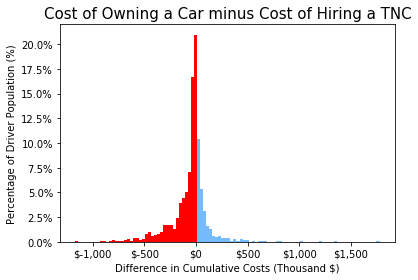

In [6]:
plt.ylabel('Percentage of Driver Population (%)',size=10)
plt.xlabel('Difference in Cumulative Costs (Thousand $)',size=10)

Decision=Decision[:2000]
#Computes a frequency histogram instad of a probabilty density histogram.
#This means the height of the bars sum to 1.
#Normally if you use density=True you get a probability density histogrram where the area of the graph sums to one.
weights = np.ones_like(Decision)/float(len(Decision))
N, bins, patches=plt.hist(Decision, weights=weights,bins=n_bins,color='xkcd:sky blue')

# N, bins, patches =plt.hist(Decision, bins=n_bins, density=True)
#plt.style.use('dark_background')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax=plt.gca()
plt.title('Cost of Owning a Car minus Cost of Hiring a TNC',size=15)
ax.xaxis.set_major_formatter(tick) 

# patches.set_fill(True)

for i in np.arange(0,40,1):
    patches[i].set_fc('r')

#Trying to format y axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))

#ax.grid()

# Figure size
# plt.figure(figsize=(15,15))
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

figure=plt.gcf()
plt.savefig('montecarlo.png',dpi=500,bbox_inches='tight')

mean = np.mean(Decision)

In [ ]:
# Decision_outlier=Decision[2000:]
# Decision_trim=Decision[:2000]

In [ ]:
####################Graph with break in it

f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

ax.set_ylabel('Percentage of Driver Population (%)',size=10)
ax.set_xlabel('Difference in Cumulative Costs (Thousand $)',size=10)

#Filter outliers
Decision_outlier=Decision[2000:]
Decision_trim=Decision[:2000]

#Computes a frequency histogram instad of a probabilty density histogram.
#This means the height of the bars sum to 1.
#Normally if you use density=True you get a probability density histogrram where the area of the graph sums to one.
weights = np.ones_like(Decision_trim)/float(len(Decision_trim))
N, bins, patches=ax.hist(Decision_trim, weights=weights,bins=n_bins,color='xkcd:sky blue')

# N, bins, patches =plt.hist(Decision, bins=n_bins, density=True)
#plt.style.use('dark_background')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
# ax=plt.gca()
ax.set_title('Value of Ride minus Value of Drive',size=15)
ax.xaxis.set_major_formatter(tick) 

# patches.set_fill(True)

for i in np.arange(0,31,1):
    patches[i].set_fc('r')

#Trying to format y axis
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

# Figure size
# plt.figure(figsize=(15,15))
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

figure=plt.gcf()
plt.savefig('montecarlo_break.png',dpi=500,bbox_inches='tight')

mean = np.mean(Decision)


In [ ]:
# # plot the same data on both axes
# ax.plot(x, y)
# ax2.plot(x, y)

# ax.set_xlim(0,7.5)
# ax2.set_xlim(40,42.5)

# # hide the spines between ax and ax2
# ax.spines['right'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# ax.yaxis.tick_left()
# ax.tick_params(labelright='off')
# ax2.yaxis.tick_right()

# # This looks pretty good, and was fairly painless, but you can get that
# # cut-out diagonal lines look with just a bit more work. The important
# # thing to know here is that in axes coordinates, which are always
# # between 0-1, spine endpoints are at these locations (0,0), (0,1),
# # (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# # appropriate corners of each of our axes, and so long as we use the
# # right transform and disable clipping.

# d = .015 # how big to make the diagonal lines in axes coordinates
# # arguments to pass plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((1-d,1+d), (-d,+d), **kwargs)
# ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d,+d), (1-d,1+d), **kwargs)
# ax2.plot((-d,+d), (-d,+d), **kwargs)

# # What's cool about this is that now if we vary the distance between
# # ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# # the diagonal lines will move accordingly, and stay right at the tips
# # of the spines they are 'breaking'


In [ ]:
Decision.max()

In [7]:
Uber_wins = 0 
Car_wins = 0
for i in range(0,len(Decision)):
    if Decision[i] < 0:
        Car_wins += 1
    else:
        Uber_wins += 1

Uber_percent = float(Uber_wins)/len(Decision)
Car_percent = float(Car_wins)/len(Decision)

In [8]:
print(Uber_percent, 'of the US is better off Ubering')
print(Car_percent, 'of the US is better off Car Owning')

0.3085 of the US is better off Ubering
0.6915 of the US is better off Car Owning


In [ ]:
#Adding Subsidy
#Decision is already in thousands
#So each subsidy is also of unit thousands
base_subsidy=1000
subsidy=np.hstack((np.linspace(0,.9,10),np.linspace(1,125,125)))
out=[]
years=7
for s in subsidy:
    Uber_wins = 0 
    Car_wins = 0
    Decision_temp=Decision+(s*years)
    #7 years
    for i in range(0,len(Decision_temp)):
        if Decision_temp[i] < 0:
            Car_wins += 1
        else:
            Uber_wins += 1
    out.append([s*1000,(s*7)*1000,float(Uber_wins)/len(Decision_temp)])

In [ ]:


x=PrettyTable()
x.field_names=['Subsidy Yearly ($/yr)','Subsidy Total ($)','Uber Percent (%)']
[x.add_row(r) for r in out]
print(x)

In [ ]:
# out_fullvalue=out
out_halfvalue=out

In [ ]:
#Temp Code
# out=out_fullvalue
# out=out_halfvalue
plt.style.use('seaborn-white')


# p=plt.plot([x[1]/1000 for x in out],[x[2] for x in out])
plt.plot([x[1]/1000 for x in out],[x[2] for x in out_fullvalue],'k--',linewidth=.7)
plt.plot([x[1]/1000 for x in out],[x[2] for x in out_halfvalue],'r^',linewidth=.7)



plt.title('Subsidy vs. % of Population Better Off Using Mobility Services',size=15)
plt.ylabel('% of Population Better Off Using Mobility Services (%)',size=15)
plt.xlabel('Subsidy (Thousand $ per year)',size=15)

# plt.plot([x[0] for x in cost_per_ride],[y[1] for y in cost_per_ride],
#          'r^',[x[0] for x in cost_per_ride],[y[1] for y in cost_per_ride],'k--',
#         linewidth=.7)




ax=plt.gca()
ax.set_xscale('log')
ax.grid()
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.StrMethodFormatter("${x:,.0f}"))
# ax.set_ylim(ymin=0)

plt.tight_layout()


fig=plt.gcf()
fig.savefig('functionOfSubsidy',dpi=500)

In [ ]:
###########################################################
#Producing Cost Per Ride to Percentage Plot

# cost_per_mile=np.arange(.1,3.1,.1)
cost_per_mile=np.array([.02,.06,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. ])
cost_per_ride=[]

for x in range(0,len(cost_per_mile)):

    #Monte Carlo Simulation
    output_year = (7,)
    Decision = np.zeros((1,simsize))
    Car_NPV = []
    Uber_NPV = []

    for i in range(0,simsize-1):
    #     print 'Time Worth', Time_Worth[i]
    #     print 'Annual_Miles_Avg Worth', Annual_Miles_Avg[i]
    #     print 'Car Price', Car_Price[i]

        a,b,c = Car_Ownsership_Expense_Model(outputyears=output_year,annualmiles = Annual_Miles_Avg[i],carprice=Car_Price[i],timeworth= Time_Worth[i], triptime= Trip_Time_Avg[i])
        d = Uber_Expense_Model(farepermile=cost_per_mile[x],outputyears= output_year,timeworth=Time_Worth[i],annualmiles=Annual_Miles_Avg[i],carprice = Car_Price[i],triptime= Trip_Time_Avg[i])
        Car_NPV.append(a)
        Uber_NPV.append(d)

    #     print 'Car Own Cost', a[0]
    #     print 'Uber Cost', d
        #d is expense of ubering
        Decision[0,i] = a[0]-d



    Decision = np.transpose(Decision)
    n_bins=100
    Decision=Decision/1000 


    Uber_wins = 0 
    Car_wins = 0
    for i in range(0,len(Decision)):
        if Decision[i] < 0:
            Car_wins += 1
        else:
            Uber_wins += 1

    Uber_percent = float(Uber_wins)/len(Decision)
    Car_percent = float(Car_wins)/len(Decision)
    
    print("Cost Per Mile is ", cost_per_mile[x])
    print(Uber_percent, 'of the US is better off Ubering')
    print(Car_percent, 'of the US is better off Car Owning')

    cost_per_ride.append((cost_per_mile[x],Uber_percent))


In [ ]:
#Derivative Calculation
deriv_cpr=[(cost_per_ride[x+1][1]-cost_per_ride[x][1])/(cost_per_ride[x+1][0]-cost_per_ride[x][0]) for x in range(len(cost_per_ride)-1)]

#Fudging and smoothing out the data
deriv_cpr[4]=deriv_cpr[4]-(deriv_cpr[3]-deriv_cpr[6])/3
deriv_cpr[5]=deriv_cpr[4]-2*(deriv_cpr[3]-deriv_cpr[6])/3

In [ ]:
plt.style.use('seaborn-white')

plt.plot([x[0] for x in cost_per_ride],[y[1] for y in cost_per_ride],
         'r^',[x[0] for x in cost_per_ride],[y[1] for y in cost_per_ride],'k--',
        linewidth=.7)

fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax=plt.gca()
plt.title('Adoption of Mobility Services as a Function of Fare Price',size=15)
ax.xaxis.set_major_formatter(tick) 

#Trying to format y axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.grid()
plt.ylabel('% of Population Better Off Using Mobility Services (%)',size=10)
plt.xlabel('Fare Per Mile ($/mile)',size=10)
fig=plt.gcf()
ax.set_ylim(ymin=-.05)
ax.set_xlim(xmin=-.05)

fig.savefig('functionoffareprice.png',dpi=500,facecolor=fig.get_facecolor())



In [ ]:
plt.style.use('seaborn-white')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot([x[0] for x in cost_per_ride],[y[1] for y in cost_per_ride],
         'r^',[x[0] for x in cost_per_ride],[y[1] for y in cost_per_ride],'r--',
        linewidth=.7)
ax2.plot([x[0] for x in cost_per_ride[:-1]],[y for y in deriv_cpr],
         'bs',[x[0] for x in cost_per_ride[:-1]],[y for y in deriv_cpr],'b--',
        linewidth=.7)

fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
plt.title('Economic Advantage of Mobility Services as a Function of Fare Price',size=14)
ax1.xaxis.set_major_formatter(tick) 

ax.set_ylim(ymin=-.05)
ax.set_xlim(xmin=-.05)

#Trying to format y axis
#ax1.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax1.grid()
ax1.set_ylabel('% of Population Better Off Using Mobility Services (%)',size=9)
ax1.set_xlabel('Fare Per Mile ($/mile)',size=12)
ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax1.tick_params('y', colors='r')

ax2.set_ylabel('Slope of Advantage Curve (%-mile/$)',size=12,color='k')
ax2.tick_params('y', colors='b')

plt.tight_layout()
fig=plt.gcf()
fig.savefig('functionoffareprice.png',dpi=600,facecolor=fig.get_facecolor())



In [ ]:
plt.plot([x[0] for x in cost_per_ride[:-1]],[y for y in deriv_cpr],
         'r^',[x[0] for x in cost_per_ride[:-1]],[y for y in deriv_cpr],'k--',
        linewidth=.7)

# print(len([x[0] for x in cost_per_ride[:-1]]))
# print(len([y for y in deriv_cpr]))

fmtx = '${x:,.2f}'
fmty = '{x:,.2f}'
tickx = mtick.StrMethodFormatter(fmtx)
# ticky = mtick.FormatStrFormatter(fmty)
ax=plt.gca()
plt.title('Derivative of Adoption of Mobility Services\nas a Function of Fare Price',size=15)

ax.xaxis.set_major_formatter(tickx) 
# ax.yaxis.set_major_formatter(ticky)

#Trying to format y axis
# plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.grid()
plt.ylabel('Slope of Adoption Rate(%-mile/$)',size=10)
plt.xlabel('Fare Per Mile ($/mile)',size=10)
fig=plt.gcf()
# ax.set_ylim(ymin=-.05)
# ax.set_xlim(xmin=-.05)
fig.savefig('deriv_functionoffareprice.png',dpi=500,facecolor=fig.get_facecolor())


In [ ]:
###########################################################
#Producing Cost Per Ride to Percentage Plot
#More granular


cost_per_mile_2=np.arange(.01,.31,.01)
cost_per_ride_2=[]

for x in range(0,len(cost_per_mile_2)):

    #Monte Carlo Simulation
    output_year = (7,)
    Decision = np.zeros((1,simsize))
    Car_NPV = []
    Uber_NPV = []

    for i in range(0,simsize-1):
    #     print 'Time Worth', Time_Worth[i]
    #     print 'Annual_Miles_Avg Worth', Annual_Miles_Avg[i]
    #     print 'Car Price', Car_Price[i]

        a,b,c = Car_Ownsership_Expense_Model(outputyears=output_year,annualmiles = Annual_Miles_Avg[i],carprice=Car_Price[i],timeworth= Time_Worth[i], triptime= Trip_Time_Avg[i])
        d = Uber_Expense_Model(farepermile=cost_per_mile_2[x],outputyears= output_year,timeworth=Time_Worth[i],annualmiles=Annual_Miles_Avg[i],carprice = Car_Price[i],triptime= Trip_Time_Avg[i])
        Car_NPV.append(a)
        Uber_NPV.append(d)

    #     print 'Car Own Cost', a[0]
    #     print 'Uber Cost', d
        #d is expense of ubering
        Decision[0,i] = a[0]-d



    Decision = np.transpose(Decision)
    n_bins=100
    Decision=Decision/1000 


    Uber_wins = 0 
    Car_wins = 0
    for i in range(0,len(Decision)):
        if Decision[i] < 0:
            Car_wins += 1
        else:
            Uber_wins += 1

    Uber_percent = float(Uber_wins)/len(Decision)
    Car_percent = float(Car_wins)/len(Decision)
    
    print("Cost Per Mile is ", cost_per_mile[x])
    print(Uber_percent, 'of the US is better off Ubering')
    print(Car_percent, 'of the US is better off Car Owning')

    cost_per_ride_2.append((cost_per_mile_2[x],Uber_percent))


In [ ]:
plt.style.use('seaborn-white')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')

plt.plot([x[0] for x in cost_per_ride_2],[y[1] for y in cost_per_ride_2],
         'r^',[x[0] for x in cost_per_ride_2],[y[1] for y in cost_per_ride_2],'k--',
        linewidth=.7)

fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax=plt.gca()
plt.title('Adoption of Mobility Services as a Function of Fare Price',size=15)
ax.xaxis.set_major_formatter(tick) 

#Trying to format y axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))

plt.ylabel('% of Population Better Off Using Mobility Services (%)',size=10)
plt.xlabel('Fare Per Mile ($/mile)',size=10)

ax.grid()
fig=plt.gcf()
fig.savefig('functionoffareprice_zoom.png',dpi=500,bbox_inches='tight',facecolor=fig.get_facecolor())